# Linear Regression Examples
This notebook will show an example of using linear regression to find the coefficients of linear data (y = ax + b).

## Imports

In [1]:
# Imports
#import math # Testing values.
import matplotlib.pyplot as plt # Plotting graphs.
import pandas as pd # Data manipulation.
import seaborn as sns; sns.set() # Only used for styling plots.
import numpy as np # Arrays and matrices.
import random # Generating data and error values.

from sklearn.model_selection import train_test_split # Data tools.
from sklearn.linear_model import LinearRegression # Linear regression.
from sklearn import metrics # Scoring our model.

%matplotlib inline

print("Imports Finished.")

Imports Finished.


## Data Generation

In [2]:
# These are the "secret" coefficients that linear regression will try to find.
a0 = -2540.8234
a1 = 7.1845

random.seed(27)

# Generate evenly spaced x values in a list.
x_range = 100
x_length = 100
myset_array = np.linspace(0, x_range, x_length)

# Generate random error values in a list.
error_range = 500
error = random.sample(range(error_range), k=x_length)
error_array = np.array(error)

# Assemble and Transpose the data.
data = [myset_array, error_array]
dataT = np.transpose(data)

# Assemble these lists into a pandas dataframe.
df = pd.DataFrame(dataT, columns = ["x", "e"])

# Modify the error values so they have a mean of zero.
diff = error_range // 2
df["e"] = df["e"] - diff

# Add additional columns for a0 and a1 into the dataframe.
df["a0"] = a0
df["a1"] = a1

# Calculate y values with the formula: y = a0 + a1*x + e
df["y_observed"] = df["a0"] + df["a1"] * df["x"] + df["e"]

# Also calculate the true y values (no error term).
df["y_ground_truth"] = df["y_observed"] - df["e"]

# Print dataframe.
df.head()

,x,e,a0,a1,y_observed,y_ground_truth
0,0.000000,82.0,-2540.8234,7.1845,-2458.823400,-2540.823400
1,1.010101,-5.0,-2540.8234,7.1845,-2538.566329,-2533.566329
2,2.020202,109.0,-2540.8234,7.1845,-2417.309259,-2526.309259
3,3.030303,-109.0,-2540.8234,7.1845,-2628.052188,-2519.052188
4,4.040404,240.0,-2540.8234,7.1845,-2271.795117,-2511.795117


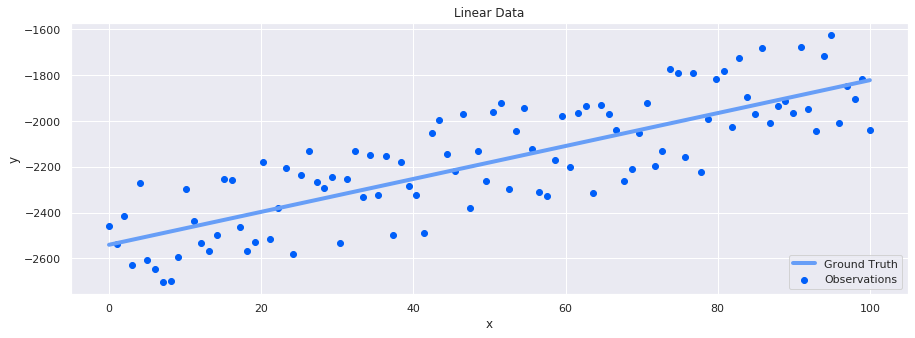

In [3]:
# Plot the results.
# Generate Figure object and Axes object with shape 3x1
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# [Row][Column]
axes.set_title("Linear Data")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.scatter(df["x"], df["y_observed"], color="#005ff9")
axes.plot(df["x"], df["y_ground_truth"], color="#679ef7", linewidth=4)
#axes[0][0].fill_between(time_s, vsp, zeros, alpha=0.2, color="#005ff9")
axes.legend(["Ground Truth", "Observations"], loc="lower right")

## Linear Regression (Training)

In [4]:
# Split the data into dependent and independ variables.
x = df["x"]
y = df["y_observed"]

# Divide the data up for training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9)

In [5]:
# Create a model.
model = LinearRegression()

# Reshape the data, otherwise fit() fails.
#x_train_array = np.array(x_train)
#x_train_array = x_train_array.reshape((-1, 1))
#y_train_array = np.array(y_train)
#y_train_array = y_train_array.reshape((-1, 1))

#x_test_array = np.array(x_test)
#x_test_array = x_test_array.reshape((-1, 1))
#y_test_array = np.array(y_test)
#y_test_array = y_test_array.reshape((-1, 1))

# Fit the model to the data.
model = model.fit(x_train[:, np.newaxis], y_train)

# Print learned model coefficients.
a0_prediction = model.intercept_
a1_prediction = model.coef_[0]

print("a0_prediction:", a0_prediction)
print("a1_prediction:", a1_prediction)

a0_prediction: -2496.9062099708644
a1_prediction: 5.983359825186139


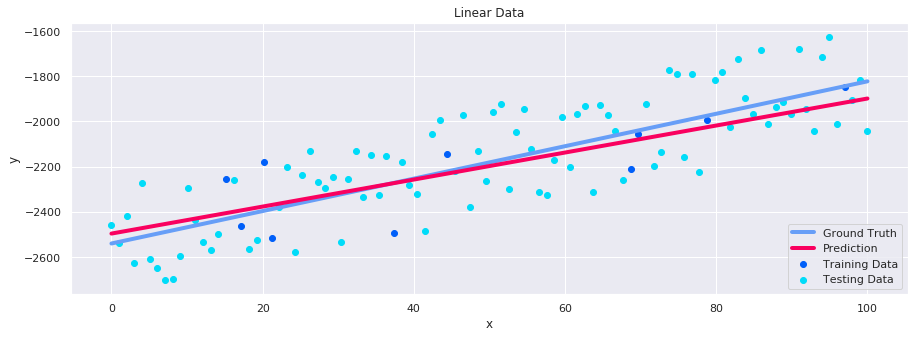

In [6]:
# Generate the fitted line.
df["y_pred"] = a0_prediction + a1_prediction * df["x"]

# Plot the results.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# [Row][Column]
axes.set_title("Linear Data")
axes.set_ylabel("y")
axes.set_xlabel("x")
axes.scatter(x_train, y_train, color="#005ff9")
axes.scatter(x_test, y_test, color="#00dcf9")
axes.plot(df["x"], df["y_ground_truth"], color="#679ef7", linewidth=4)
axes.plot(df["x"], df["y_pred"], color="#f9005f", linewidth=4)
axes.legend(["Ground Truth", "Prediction", "Training Data", "Testing Data"], loc="lower right")

## Measuring Model Performance (Testing)

In [7]:
# How far off were the coefficients from their true values?
a0_error = a0_prediction - a0
a1_error = a1_prediction - a1
print("a0_error:", a0_error)
print("a1_error:", a1_error)
print(" ")

# What was the mean squared error on the Training Data?
predictions = model.predict(x_train[:, np.newaxis])
mse_train = metrics.mean_squared_error(y_train[:, np.newaxis], predictions)
print("mse_train:", mse_train)

# What was the mean squared error on the Testing Data?
predictions = model.predict(x_test[:, np.newaxis])
mse_test = metrics.mean_squared_error(y_test[:, np.newaxis], predictions)
print("mse_test:", mse_test)

a0_error: 43.91719002913578
a1_error: -1.2011401748138608
 
mse_train: 16652.47395273552
mse_test: 25050.593458952582


## Conclusion
The a0_error tends to be larger than the a1_error. This means that our linear regression model is pretty good at finding the slope of the line, and not as good at finding the y-intercept.

When we look at mean squared error for the training and testing datasets, we see that the error is usually larger for the testing data. This intuitively makes sense because our model has not seen this data beforehand.

In [8]:
df.describe()

,x,e,a0,a1,y_observed,y_ground_truth,y_pred
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,50.000000,10.510000,-2.540823e+03,7.184500e+00,-2171.088400,-2181.598400,-2197.738219
std,29.304537,149.139518,4.570383e-12,5.355917e-15,260.964790,210.538449,175.339591
min,0.000000,-244.000000,-2.540823e+03,7.184500e+00,-2703.023905,-2540.823400,-2496.906210
25%,25.000000,-116.250000,-2.540823e+03,7.184500e+00,-2324.662036,-2361.210900,-2347.322214
50%,50.000000,-4.000000,-2.540823e+03,7.184500e+00,-2174.484006,-2181.598400,-2197.738219
75%,75.000000,147.500000,-2.540823e+03,7.184500e+00,-1968.207617,-2001.985900,-2048.154223
max,100.000000,249.000000,-2.540823e+03,7.184500e+00,-1624.658754,-1822.373400,-1898.570227
